In [ ]:
import numpy
import sys
import numpy as np
import tensorflow as tf
import pickle
from tqdm import tqdm_notebook as tqm

import matplotlib.pyplot as plt

sys.path.append('..')

from linknet import LinkNetBatch
from dataset import Dataset, DatasetIndex

%matplotlib inline

In [19]:
MNIST_SIZE = 1000
BATCH_SIZE = 100

In [20]:
ind = DatasetIndex(np.arange(MNIST_SIZE))
mnistset = Dataset(ind, batch_class=LinkNetBatch)
mnistset.cv_split([0.9, 0.1])

In [21]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [22]:
log = []
ppl = mnistset.train.pipeline()\
        .load()\
        .noise_and_mask()\
        .train(sess, log)

In [23]:
for i in tqm(range(90)):
    ppl.next_batch(BATCH_SIZE, n_epochs=1)

A Jupyter Widget

In [ ]:
for i in tqm(range(int(MNIST_SIZE * 0.9/BATCH_SIZE))):
    ppl.next_batch(BATCH_SIZE, n_epochs=1)

A Jupyter Widget

KeyboardInterrupt: 

In [25]:
prediction = []
ppl_test = mnistset.test.pipeline()\
            .load()\
            .noise_and_mask()\
            .predict(sess, prediction)\
            .run(int(MNIST_SIZE * 0.1))

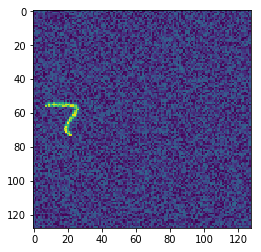

In [32]:
plt.imshow(prediction[0][0][0].reshape([128, 128]))
plt.show()

In [37]:
a = np.zeros((10,10))